# Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import time
import seaborn as sns
import matplotlib.pyplot as plt

# LogReg

In [2]:
class LogisticRegression_:
    def __init__(self,threshold = 0.5, tol = 0.01):
        self.__threshold = threshold
        self.__tol = tol

    def predict(self,X):
        return self.__quantizer(self.__activator(X))

    def __activator(self,X):
        return self.__sigmoid(self.__net_input(X))

    def __net_input(self, X):
        return np.dot(X,self.coef_) + self.intercept_

    def __sigmoid(self, net_input):
        s = 1.0/(1.0 + np.exp(-net_input))
        np.minimum(s, 1.0 - np.finfo(np.float64).eps,out=s)
        np.maximum(s, np.finfo(np.float64).eps,out=s)
        return s

    def __quantizer(self, positive_propability):
        return np.where(positive_propability > self.__threshold, 1, 0)
    
    def cost(self,X,y):
        p = self.__sigmoid(self.__net_input(X))
        return (y*np.log(p) + (1-y)*np.log(1-p)).sum()
    
    def __split_mini_batch(self,X,y,batch_count):
        n,_=X.shape
        rX,ry = shuffle(X,y)
        if batch_count > n:
            batch_count = n
        rx = np.array_split(rX,batch_count)
        ry = np.array_split(ry,batch_count)
        return zip(rx,ry)
        
    def fit(self,X,y_true,learning_rate,batch_count):
        it = 0
        y_true = y_true.reshape((-1,1))
        (n,m) = X.shape
        self.coef_ = np.random.normal( size = (m,1))
        self.intercept_ = np.random.normal()
        current_cost = self.cost(X,y)
        while it < 1000:
            prev_cost = current_cost
            Mini_batches = self.__split_mini_batch(X,y_true,batch_count)
            for Xi,yi in Mini_batches:
                y_p = self.__activator(Xi)
                error = yi - y_p
                d_intercept = learning_rate * error.sum()
                d_coef = learning_rate * (Xi.T).dot(error)
                self.coef_ += d_coef
                self.intercept_ += d_intercept
            current_cost = self.cost(X,y)
            if(abs(prev_cost - current_cost) < self.__tol):
                break
            it+=1
        self.it=it
        return self
log_reg = LogisticRegression_()

# Iris Data

In [3]:
df = pd.read_csv(filepath_or_buffer='data/iris.csv',sep=',',nrows=100)
df['label'] = preprocessing.LabelEncoder().fit_transform(df['label'])
df = shuffle(df)

In [4]:
params = ['sepal length','sepal width']

In [5]:
y = df['label'].values
X = df[params].values

## Batch count = 1 => GD

In [6]:
now = time.time()
log_reg.fit(X,y,0.01,1)
print('time :',now - time.time())
print('iterations :',log_reg.it)

time : -0.49449753761291504
iterations : 1000


In [7]:
print('accuracy = ',accuracy_score(y,log_reg.predict(X)))

accuracy =  0.99


## Batch count 100 => SGD

In [8]:
now = time.time()
log_reg.fit(X,y,0.01,100)
print('time :',now - time.time())
print('iterations :',log_reg.it)

time : -3.3810088634490967
iterations : 1000


In [9]:
print('accuracy = ',accuracy_score(y,log_reg.predict(X)))

accuracy =  0.99


## Batch count = 10 => mini-batch GD

In [10]:
now = time.time()
log_reg.fit(X,y,0.1,10)
print('time :',now - time.time())
print('iterations :',log_reg.it)

time : -0.48947763442993164
iterations : 1000


In [11]:
y_pred = log_reg.predict(X)
print('accuracy = ',accuracy_score(y,y_pred))

accuracy =  0.99


In [16]:
b = log_reg.intercept_
w0 = log_reg.coef_[0]
w1 = log_reg.coef_[1]

In [17]:
slope = -(b / w1)/(b/w0)
intercept = -b / w1
decision_boundary = lambda x : ((slope*x) + intercept)

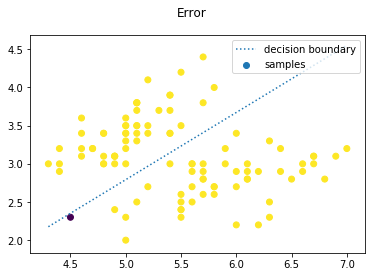

In [18]:
plt.figure().suptitle('Error')
X_plot = np.linspace(df[params[0]].min(), df[params[0]].max())
Y_plot = decision_boundary(X_plot)
plt.plot(X_plot, Y_plot, linestyle=':')
plt.scatter(X[:,0],X[:,1],label=params,c = (y == y_pred.ravel()))
plt.legend(('decision boundary', 'samples'),loc='upper right')
plt.show()

# Heart

Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     

In [19]:
attributes = ['1','2','3','4','5','6','7','8','9','10','11','12','13','class']
df = pd.read_csv('data/heart.csv',sep=' ',header=None,names=attributes)

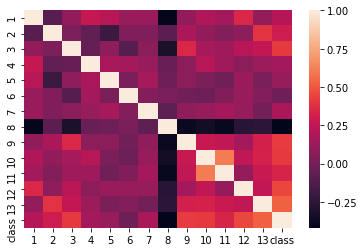

In [20]:
sns.heatmap(df.corr())
plt.show()

## Proportion

In [21]:
df.groupby('class').size()

class
1    150
2    120
dtype: int64

## Preprocess

In [22]:
real = ['1','4','5','8','10','12']
ordered = ['11']
binary = ['2','6','9']
nominal = ['7','3','13']

Variable to be predicted
---------------------------------
Absence (1) or presence (2) of heart disease

Cost Matrix

	     abse  pres
absence	 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1<br>
presence &nbsp;&nbsp;&nbsp;&nbsp;   5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;	0

In [23]:
df['class'] = df['class'].replace({2:1,1:0})
df = pd.get_dummies(df,columns=nominal+binary,drop_first = True)
df[real] = preprocessing.StandardScaler().fit_transform(df[real].values)
df[ordered] = preprocessing.MinMaxScaler().fit_transform(df[ordered].values)

## Data split

In [24]:
y = df['class'].values
X = df.drop(columns = 'class').values

In [25]:
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size = 0.2)

## Training

In [26]:
y_train_prediction = log_reg.fit(X_train,y_train,0.01,8).predict(X_train)

## Accuracy on test set

In [27]:
print(accuracy_score(y_train,y_train_prediction.ravel()))

0.8657407407407407


## Accuracy on validation set

In [28]:
print(accuracy_score(y_validation,log_reg.predict(X_validation)))

0.9074074074074074


# LogReg with 0.7 threshold

In [29]:
log_reg_2 = LogisticRegression_(threshold=0.7)

In [30]:
log_reg_2.fit(X_train,y_train,0.01,8);

## Accuracy on train

In [31]:
print(accuracy_score(y_train,log_reg_2.predict(X_train)))

0.8379629629629629


## Accuracy on validation

In [32]:
print(accuracy_score(y_validation,log_reg_2.predict(X_validation)))

0.8703703703703703


# LogReg with 0.25 threshold

In [33]:
log_reg_3 = LogisticRegression_(threshold=0.25)

In [34]:
log_reg_3.fit(X_train,y_train,0.01,8);

## Accuracy on train

In [35]:
print(accuracy_score(y_train,log_reg_3.predict(X_train)))

0.8425925925925926


## Accuracy on test

In [36]:
print(accuracy_score(y_validation,log_reg_3.predict(X_validation)))

0.8518518518518519
